In [11]:
import dropbot
import logging; logging.basicConfig(level=logging.DEBUG)
import time

import mr_box_peripheral_board as mrbox
import serial
import numpy as np

#Connect to dropbot
try:
    db_proxy.terminate()
except:
    pass

db_proxy = dropbot.SerialProxy()
print db_proxy.properties

#Turn on Channel 24 - Pump reservoir
db_proxy.hv_output_enabled = True
db_proxy.hv_output_selected = True
db_proxy.voltage = 100

state = np.zeros(db_proxy.number_of_channels)
state[24] = 1
db_proxy.state_of_channels = state

capacitance = []

#Connect to peripheral
reload(mrbox)

# Try to connect to MR-Box control board.
retry_count = 2
for i in xrange(retry_count):
    try:
        proxy.terminate()
    except NameError:
        pass
    try:
        proxy = mrbox.SerialProxy(port='COM12',baudrate=57600, settling_time_s=2.5)
        break
    except serial.SerialException:
        time.sleep(1)
else:
    raise IOError('Could not connect to MR-Box control board.')
    
proxy._timeout_s = 20

DEBUG:serial_device.threaded:Connection to port `COM11` closed
DEBUG:base_node_rpc.proxy:Connection lost `COM11`
DEBUG:base_node_rpc.proxy:Attempt to connect to device on port COM11 (baudrate=115200)
DEBUG:serial_device.threaded:Open `COM11` and monitor connection status
DEBUG:serial_device.threaded:connection_made: `COM11` `<ReaderThread(Thread-21, started daemon 3948)>`
DEBUG:base_node_rpc.proxy:Wait for connection to port COM11
INFO:base_node_rpc.proxy:Successfully connected to dropbot on port COM11


base_node_software_version                                         0.26
package_name                                                    dropbot
display_name                                                    DropBot
manufacturer                                              Sci-Bots Inc.
url                           http://gitlab.com/sci-bots/dropbot.py.git
software_version                                                   1.19
dtype: object


DEBUG:serial_device.threaded:connection_made: `COM12` `<ReaderThread(Thread-22, started daemon 8168)>`
DEBUG:base_node_rpc.proxy:Reconnected to `COM12`
DEBUG:serial_device.threaded:Connection to port `COM12` closed
DEBUG:base_node_rpc.proxy:Attempt to connect to device on port COM12 (baudrate=57600)
DEBUG:base_node_rpc.proxy:Connection lost `COM12`
DEBUG:serial_device.threaded:Open `COM12` and monitor connection status
DEBUG:base_node_rpc.proxy:Wait for connection to port COM12
DEBUG:base_node_rpc.proxy:Attempt to connect to device on port COM12 (baudrate=57600)
DEBUG:serial_device.threaded:Open `COM12` and monitor connection status
DEBUG:serial_device.threaded:connection_made: `COM12` `<ReaderThread(Thread-25, started daemon 9152)>`
DEBUG:base_node_rpc.proxy:Wait for connection to port COM12
INFO:base_node_rpc.proxy:Successfully connected to mr-box-peripheral-board on port COM12


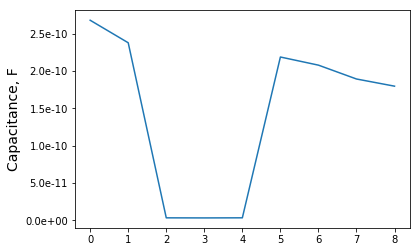

In [26]:
cap=0
x = []
for i in range(0,100):
    x.append(db_proxy.measure_capacitance())
cap = sum(x)/len(x) 
capacitance.append(cap)
#print capacitance

import dropbot.hardware_test
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Capacitance, F', fontsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax.plot(capacitance)

In [31]:
state[23] = 
db_proxy.state_of_channels = state

In [30]:
import time
proxy.pump_frequency_set(10000)
state[24] = 1
db_proxy.state_of_channels = state

for i in range(0,100):
    x.append(db_proxy.measure_capacitance())
cap_ini = sum(x)/len(x)
print 'Capacitance of empty reservoir: %s'%cap_ini
cap = cap_ini
start_time = time.time()
end_time = start_time
dt = end_time-start_time
while ((cap<cap_ini*15) and (dt<10)):
    proxy.pump_activate()
    x = []
    for i in range(0,10):
        x.append(db_proxy.measure_capacitance())
    cap = sum(x)/len(x)  
    end_time = time.time()
    dt = end_time-start_time
    proxy.pump_deactivate()
print 'Capacitance of filled reservoir: %s'%cap

Capacitance of empty reservoir: 1.81147415718e-11
Capacitance of filled reservoir: 2.11387285282e-10
